In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
startup=pd.read_csv("C:\ExcelR\Data Scientist\Multi Linear Regression\Startups.csv")
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [3]:
startup.shape

(50, 5)

# EDA

In [4]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
startup_1=startup.rename({'R&D Spend':'RDS','Marketing Spend':'MKS','Administration':'ADMIN'},axis=1)
startup_1

,RDS,ADMIN,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
startup_1[startup_1.duplicated()]

,RDS,ADMIN,MKS,State,Profit


In [7]:
#check for missing values
startup_1.isna().sum()

RDS       0
ADMIN     0
MKS       0
State     0
Profit    0
dtype: int64

# Correlation Analysis

In [8]:
startup_1.corr()

,RDS,ADMIN,MKS,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMIN,0.241955,1.000000,-0.032154,0.200717
MKS,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


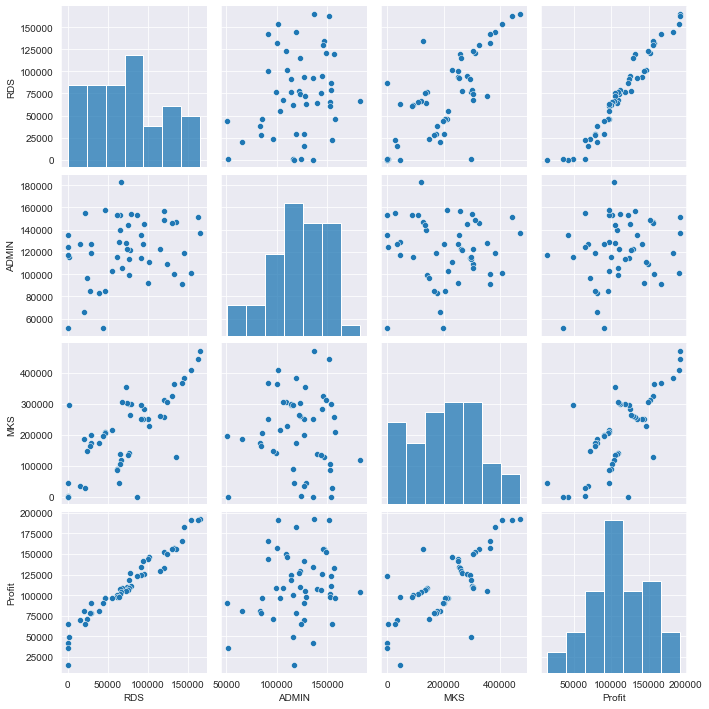

In [9]:
sns.set_style(style='darkgrid')
sns.pairplot(startup_1)

# Preparing a model

In [10]:
model = smf.ols('Profit~RDS+MKS+ADMIN',data=startup_1).fit()

In [11]:
#Coefficients
model.params

Intercept    50122.192990
RDS              0.805715
MKS              0.027228
ADMIN           -0.026816
dtype: float64

In [12]:
#t and p-Values
print(model.tvalues, '\n', model.pvalues)

Intercept     7.626218
RDS          17.846374
MKS           1.655077
ADMIN        -0.525507
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
MKS          1.047168e-01
ADMIN        6.017551e-01
dtype: float64


In [13]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

Build Simple Linear Regression and Multi Linear Regression for MKS and ADMIN variables

In [14]:
slr_a=smf.ols("Profit~ADMIN",data=startup_1).fit()
slr_a.tvalues , slr_a.pvalues 

(Intercept    3.040044
 ADMIN        1.419493
 dtype: float64,
 Intercept    0.003824
 ADMIN        0.162217
 dtype: float64)

In [15]:
slr_m=smf.ols("Profit~MKS",data=startup_1).fit()
slr_m.tvalues , slr_m.pvalues 

(Intercept    7.808356
 MKS          7.802657
 dtype: float64,
 Intercept    4.294735e-10
 MKS          4.381073e-10
 dtype: float64)

In [16]:
mlr_am=smf.ols("Profit~ADMIN+MKS",data=startup_1).fit()
mlr_am.tvalues , mlr_am.pvalues  

(Intercept    1.142741
 ADMIN        2.467779
 MKS          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMIN        1.729198e-02
 MKS          9.727245e-11
 dtype: float64)

# Calculating VIF

In [17]:
rsq_rd = smf.ols('RDS~MKS+ADMIN',data=startup_1).fit().rsquared  
vif_rd = 1/(1-rsq_rd) # 16.33

rsq_ms = smf.ols('MKS~RDS+ADMIN',data=startup_1).fit().rsquared  
vif_ms = 1/(1-rsq_ms) # 564.98

rsq_ad = smf.ols('ADMIN~RDS+MKS',data=startup_1).fit().rsquared  
vif_ad = 1/(1-rsq_ad) #  564.84


# Storing vif values in a data frame
d1 = {'Variables':['RDS','MKS','ADMIN'],'VIF':[vif_rd,vif_ms,vif_ad]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame

,Variables,VIF
0,RDS,2.468903
1,MKS,2.326773
2,ADMIN,1.175091


No variable has VIF>20, No collinearity

# Residual Analysis

Test for Normality of Residuals (Q-Q Plot)

C:\Users\harsh\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


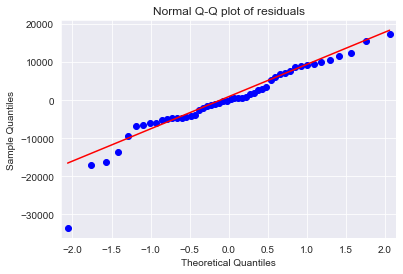

In [18]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [19]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

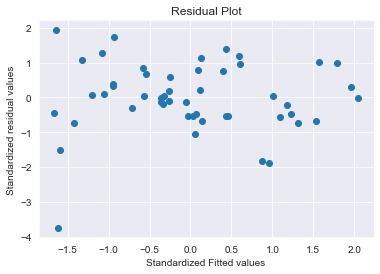

In [20]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

## Residual Vs Regressors

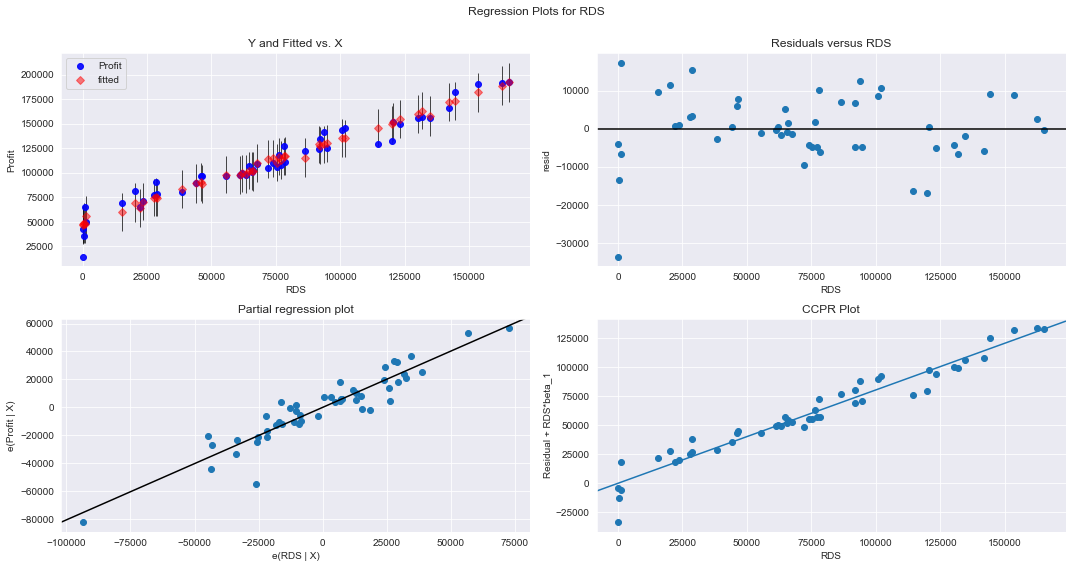

In [21]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "RDS", fig=fig)
plt.show()

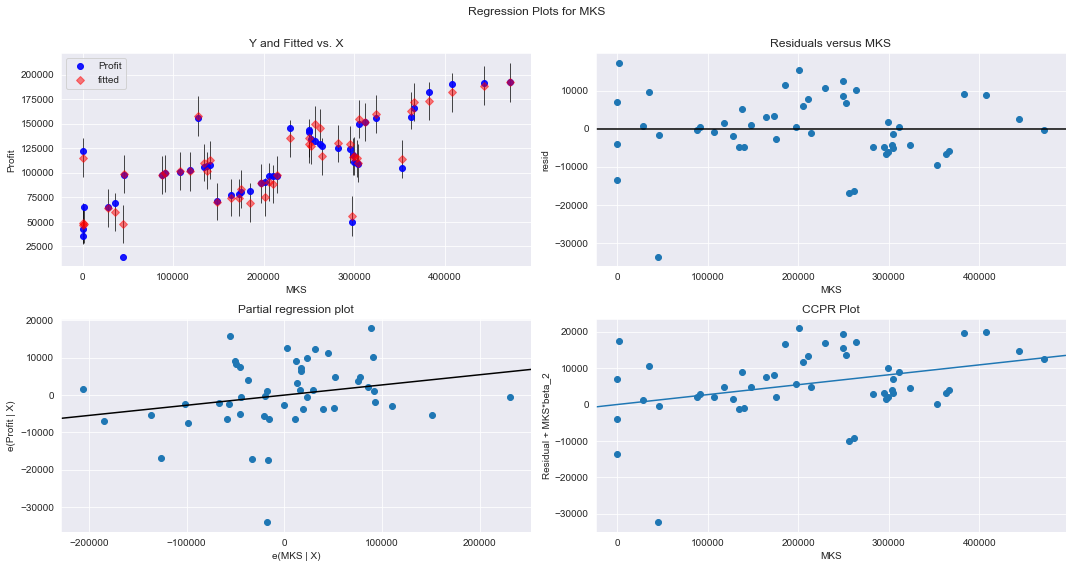

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MKS", fig=fig)
plt.show()

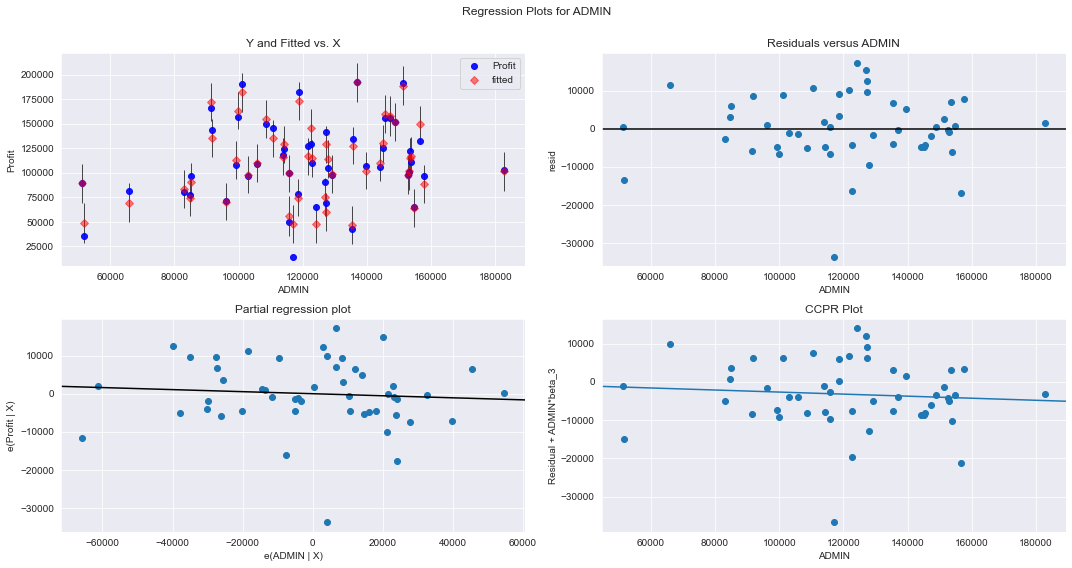

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "ADMIN", fig=fig)
plt.show()

# Model Deletion Diagnostics

## Detecting Influencers/Outliers

## Cook’s Distance

In [24]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

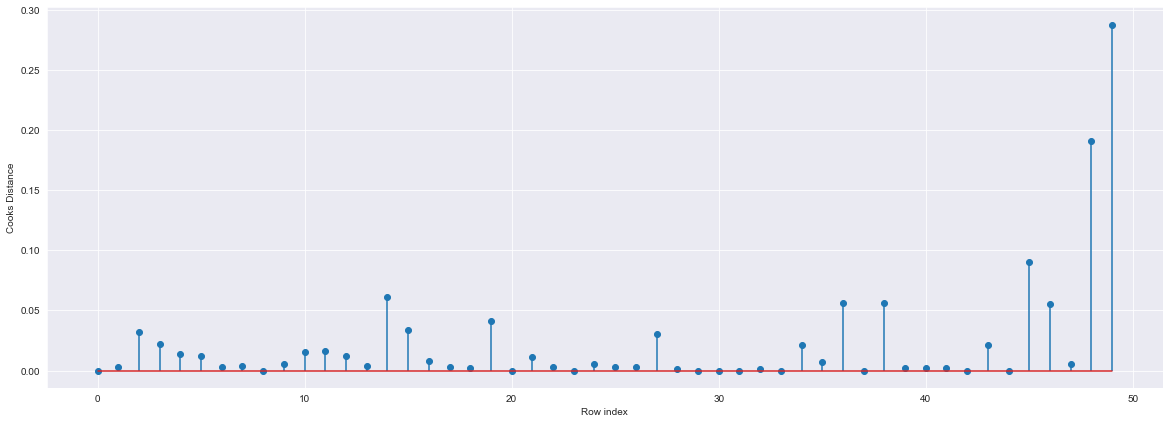

In [25]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(startup_1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [26]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(49, 0.2880822927543268)

## High Influence points

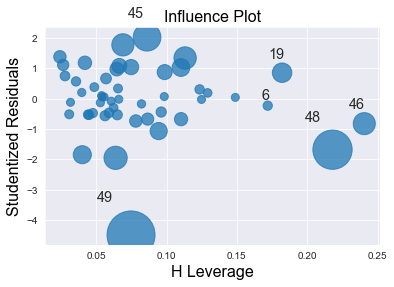

In [27]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [28]:
k=startup_1.shape[1]
n=startup_1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff


0.36

In [29]:
startup_1[startup_1.index.isin([49,48])] 

,RDS,ADMIN,MKS,State,Profit
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


# Improving the model

In [30]:
#Discard the data points which are influencers and reasign the row number (reset_index())
startup_2=startup_1.drop(startup_1.index[[49,48]],axis=0).reset_index(drop=True)
startup_2

,RDS,ADMIN,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


# Build Model

In [31]:
#Exclude variable "WT" and generate R-Squared and AIC values
final_model= smf.ols('Profit~RDS+MKS+ADMIN',data = startup_2).fit()

In [32]:
(final_model.rsquared,final_model.aic)

(0.9626766170294073, 994.6690439260116)

Recalculating to reduce max(c)<0.10

In [33]:
model_influence_1 = final_model.get_influence()
(c, _) = final_model.get_influence().cooks_distance

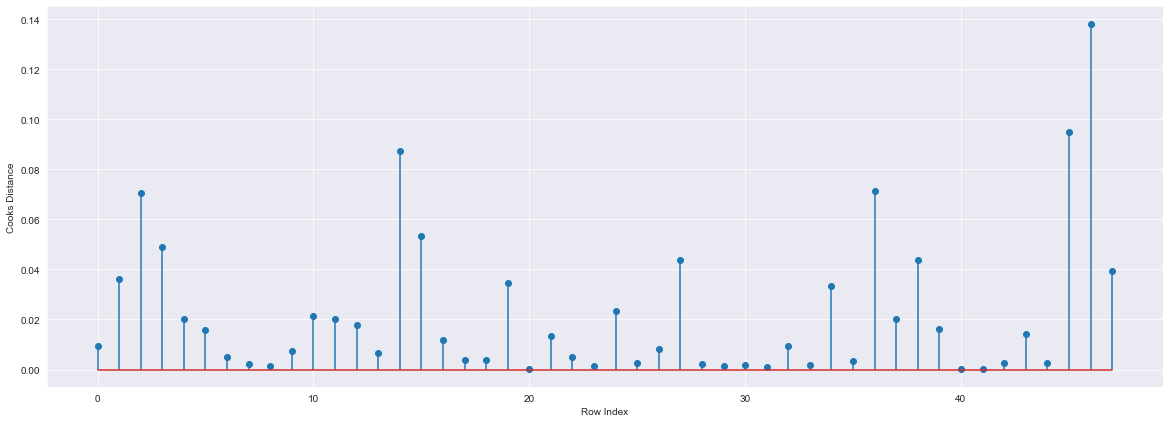

In [34]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_2)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [35]:
np.argmax(c) , np.max(c)

(46, 0.1382913399433517)

In [36]:
startup_3=startup_2.drop(startup_2.index[[46]],axis=0).reset_index(drop=True)
startup_3

,RDS,ADMIN,MKS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [37]:
final_model_2= smf.ols('Profit~RDS+MKS+ADMIN',data = startup_3).fit()

In [38]:
(final_model_2.rsquared,final_model_2.aic)

(0.9614129113440602, 973.2489443962854)

In [39]:
model_influence_2 = final_model_2.get_influence()
(c, _) = final_model_2.get_influence().cooks_distance

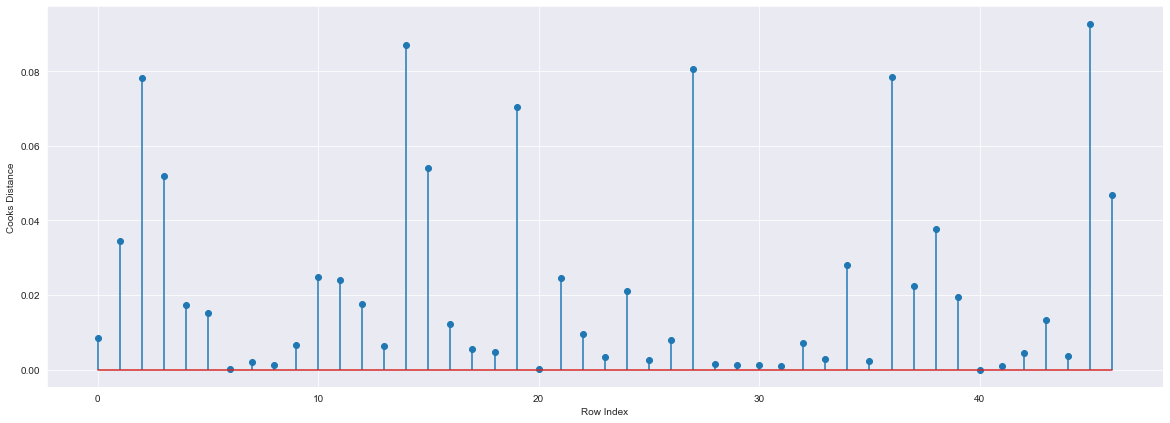

In [40]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup_3)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

As value of max(c)<0.10, we can stop the process

## Predicting for new data

In [41]:
#New data for prediction
new_data=pd.DataFrame({'RDS':165349,"ADMIN":136897,"MKS":471784},index=[0])
new_data

,RDS,ADMIN,MKS
0,165349,136897,471784


In [42]:
final_model_2.predict(new_data)

0    189143.908344
dtype: float64

In [43]:
pred_y=final_model_2.predict(startup_3)
pred_y

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
46     51024.934949
dtype: float64

# Table containing R^2 value for each prepared model

In [44]:
R2={'Prep_Models':['model','final_model','final_model_2'],'Rsquared':[model.rsquared,final_model.rsquared,final_model_2.rsquared]}
table=pd.DataFrame(R2)
table

,Prep_Models,Rsquared
0,model,0.950746
1,final_model,0.962677
2,final_model_2,0.961413
